In [117]:
pls = PLSRegression(n_components=2, scale=False)
pls.fit(X_train, Y_train)
Y_pred = pls.predict(X_test)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sc
from scipy import io
import sklearn

from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
X = sc.io.loadmat('../data/dataX.mat')['arr']
Y = sc.io.loadmat('../data/dataY.mat')['arr']
# some daily information (5 weeks)
X = X[:-8, :-35]
Y = Y[8:, :-5]

In [3]:
train_size = 700

X_train, X_test = X[:train_size, :], X[train_size:, :]
Y_train, Y_test = Y[:train_size, :], Y[train_size:, :]

In [16]:
def _svd_cross_product(X, Y):
    C = np.dot(X.T, Y)
    U, s, Vh = linalg.svd(C, full_matrices=False)
    u = U[:, [0]]
    v = Vh.T[:, [0]]
    return u, v



In [17]:
def _center_scale_xy(X, Y, scale=True):
    """ Center X, Y and scale if the scale parameter==True

    Returns
    -------
        X, Y, x_mean, y_mean, x_std, y_std
    """
    # center
    x_mean = X.mean(axis=0)
    X -= x_mean
    y_mean = Y.mean(axis=0)
    Y -= y_mean
    # scale
    if scale:
        x_std = X.std(axis=0, ddof=1)
        x_std[x_std == 0.0] = 1.0
        X /= x_std
        y_std = Y.std(axis=0, ddof=1)
        y_std[y_std == 0.0] = 1.0
        Y /= y_std
    else:
        x_std = np.ones(X.shape[1])
        y_std = np.ones(Y.shape[1])
    return X, Y, x_mean, y_mean, x_std, y_std




In [369]:
def grad_trans_function(name, x, parameters):
    param_size = parameters.shape[1]
    result = np.ones(parameters.shape)
    eps = np.finfo(X.dtype).eps
    n = param_size//2
    a = parameters[:, :n]
    c = parameters[:, n:]
    if name=='very_fast_growth':
        for i in np.arange(result.shape[0]):
            for j in np.arange(n):
                if i==j:
                    result[i,j] = 2 * np.dot(trans_function(name, x[:, i], parameters[:, i]), \
                        np.sign(x[j,:]) * np.exp(a[j, :]) * (np.exp(np.exp(c[j, :]) * np.abs(x[j, :])) - 1))
                else:
                    result[i,j] = np.dot(trans_function(name, x[:,i], parameters[:,i]), np.sign(x[j,:]) * \
                            np.exp(a[j,:]) * (np.exp(np.exp(c[j,:]) * np.abs(x[j,:])) - 1))
            for j in np.arange(n, 2*n):
                if i==(j-n):
                    result[i,j] = 2 * np.dot(trans_function(name, x[:,i], parameters[:,i]) * \
                    x[:,j] * np.exp(a[j,:] + c[j,:] + np.exp(c[j,:]) * np.abs(x[j,:])))
                else:
                    result[i,j] = np.dot(trans_function(name, x[:,i], parameters[:,i]),\
                    x[j,:] * np.exp(a[j,:] + c[j,:] + np.exp(c[j,:]) * np.abs(x[j,:])))
        
    return result

In [510]:
def trans_function(name, x, parameters):
    '''
    x - [m, n]
    parameters - [m, 2n]
    
    '''
    eps = np.finfo(X.dtype).eps
    param_size = parameters.shape[1]
    result = np.ones(x.shape)
    n = param_size//2
    a = parameters[:, :n]
    c = parameters[:, n:]
    if name=='very_fast_growth':
        result = np.sign(x) * np.exp(a) * (np.exp(np.exp(c) * np.abs(x)) - 1)
    if name=='fast_growth':
        result = np.sign(x) * np.exp(a) * (np.exp(np.exp(c) * np.abs(x) ** (1/2)) - 1)
    if name=='slow_growth':
        result = np.sign(x) * np.exp(a) * (np.exp(np.exp(c) * np.abs(x) ** (1/3)) - 1)
    if name=='slow_stabilization':
        result = np.sign(x) * np.exp(a) * (np.exp(np.exp(c) * np.abs(x) ** (1/4)) - 1)
    if name=='very_slow_stabilization':
        result = np.sign(x) * np.exp(a) * (np.exp(np.exp(c) * np.abs(x) ** (2)) - 1)
    if name=='fast_stabilization':
        result = np.sign(x) * np.exp(a) * (np.exp(np.exp(c) * \
                                                  np.log(np.log(np.abs(x) + 1) + 1)) - 1)
    if name=='sigmoid':
        result = np.sign(x) * np.exp(a) * (np.exp(np.exp(c) * np.log(np.abs(x) + 1)) - 1)
    if name == 'identity':
        result = x
    return result


In [529]:
res_

array([ 0.00893085,  0.00791298,  0.00796826,  0.00796448,  0.00768037,
        0.00742615,  0.00803269,  0.00769218,  0.00792388,  0.00737094,
        0.00763884,  0.00774395,  0.00780598,  0.00775572,  0.0073521 ,
        0.00734414,  0.00755032,  0.00766052,  0.00800745,  0.00803407,
        0.00750815,  0.00782946,  0.00783499,  0.00752317,  0.0074104 ,
        0.00775451,  0.00734941,  0.007865  ,  0.00786264,  0.00770384,
        0.00780801,  0.00778089,  0.00756493,  0.00747726,  0.00786713,
        0.0077101 ,  0.00771685,  0.00746488,  0.00793902,  0.00747637,
        0.00759886,  0.00790187,  0.00806782,  0.00766452,  0.00743316,
        0.00735252,  0.00786474,  0.00753913,  0.00798601])

In [530]:
def grad_trans_function(name, x, parameters):
    param_size = parameters.shape[1]
    result = np.ones(parameters.shape)
    eps = np.finfo(X.dtype).eps
    n = param_size//2
    a = parameters[:, :n]
    c = parameters[:, n:]
    if name=='very_fast_growth':
        result[:, :n] = np.sign(x) * np.exp(a) * (np.exp(np.exp(c) * np.abs(x)) - 1)
        result[:, n:] = np.sign(x) * np.abs(x) * np.exp(a + c + np.exp(c) * np.abs(x))
    if name=='fast_growth':
        result[:, :n] = np.sign(x) * np.exp(a) * (np.exp(np.exp(c) * np.abs(x) ** (1/2)) - 1)
        result[:, n:] = np.sign(x) * (np.abs(x) ** (1/2)) * np.exp(a + c + np.exp(c) * \
                                                                   np.abs(x) ** (1/2))
    if name=='slow_growth':
        result[:, :n] = np.sign(x) * np.exp(a) * (np.exp(np.exp(c) * np.abs(x) ** (1/3)) - 1)
        result[:, n:] = np.sign(x) * (np.abs(x) ** (1/3)) * np.exp(a + c + np.exp(c) * \
                                                                   np.abs(x) ** (1/3))
    if name=='slow_stabilization':
        result[:, :n] = np.sign(x) * np.exp(a) * (np.exp(np.exp(c) * np.abs(x) ** (1/4)) - 1)
        result[:, n:] = np.sign(x) * (np.abs(x) ** (1/4)) * np.exp(a + c + np.exp(c) * \
                                                                   np.abs(x) ** (1/4))
    if name=='very_slow_stabilization':
        result[:, :n] = np.sign(x) * np.exp(a) * (np.exp(np.exp(c) * np.abs(x) ** (2)) - 1)
        result[:, n:] = np.sign(x) * (np.abs(x) ** (2)) * np.exp(a + c + np.exp(c) * \
                                                                   np.abs(x) ** (2))
    if name=='fast_stabilization':
        result[:, :n] = np.sign(x) * np.exp(a) * np.exp(np.exp(c) * \
                                                  np.log(np.log(np.abs(x) + 1) + 1) - 1)
        result[:, n:] = np.exp(a) * np.exp(np.exp(c) * np.log(np.log(np.abs(x) + 1) + 1) - 1)*\
                    np.exp(c) / (np.log(np.abs(x) + 1) + 1)  / np.abs(x) + 1
    if name=='sigmoid':
        result[:, :n] = np.sign(x) * np.exp(a) * (np.exp(np.exp(c) * np.abs(x)) - 1)
        result[:, n:] = np.sign(x) * np.log(np.abs(x) + 1) * np.exp(a + c + np.exp(c) * \
                                                                   np.log(np.abs(x) + 1))
    if name == 'identity':
        result = 1
    return result

In [514]:
def inverse_trans_function(name, y, parameters):
    eps = np.finfo(X.dtype).eps
    param_size = parameters.shape[1]
    result = np.ones(y.shape)
    n = param_size//2
    a = parameters[:, :n]
    c = parameters[:, n:]
    if name=='very_fast_growth':
        result = np.sign(y) * (np.exp(-c) * np.log(np.abs(y) * np.exp(-a) + 1))
    if name=='fast_growth':
        result = np.sign(y) * (np.exp(-c) * np.log(np.abs(y) * np.exp(-a) + 1)) ** 2
    if name=='slow_growth':
        result = np.sign(y) * (np.exp(-c) * np.log(np.abs(y) * np.exp(-a) + 1)) ** 3
    if name=='slow_stabilization':
        result = np.sign(y) * (np.exp(-c) * np.log(np.abs(y) * np.exp(-a) + 1)) ** 4
    if name=='very_slow_stabilization':
        result = np.sign(y) * (np.exp(-c) * np.log(np.abs(y) * np.exp(-a) + 1)) ** (1/2)
    if name=='fast_stabilization':
        result = np.sign(y) * (np.exp(np.exp(np.exp(-c) * np.log(np.abs(y) * \
                                                                 np.exp(-a) + 1)) - 1) - 1)
    if name=='sigmoid':
        result = np.sign(y) * (np.exp(np.exp(-c) * np.log(np.abs(y) * np.exp(-a) + 1)) - 1)
    if name == 'identity':
        result = y
    return result

In [281]:
def _nipals_twoblocks_inner_loop(X, Y, mode="A", max_iter=500, tol=1e-06,
                                 norm_y_weights=False, trans_function_name=None, trans_parameters=None):
    """Inner loop of the iterative NIPALS algorithm.
    Provides an alternative to the svd(X'Y); returns the first left and right
    singular vectors of X'Y.  See PLS for the meaning of the parameters.  It is
    similar to the Power method for determining the eigenvectors and
    eigenvalues of a X'Y.
    """
    # ИНИЦИАЛИЗАЦИЯ 
    # y_score = Y[:, [0]]
    y_score_old = trans_function(trans_function_name, Y, trans_parameters)[:, [0]]
    x_weights_old = 0
    ite = 1
    eps = np.finfo(X.dtype).eps
    # Inner loop of the Wold algo.
    while True:
        # 1.1 Update u: the X weights
        # Mode A regress each X column on y_score
        #1. COMPUTE w
        x_weights = np.dot(X.T, y_score_old) / np.dot(y_score_old.T, y_score_old)
        # If y_score only has zeros x_weights will only have zeros. In
        # this case add an epsilon to converge to a more acceptable
        # solution
        if np.dot(x_weights.T, x_weights) < eps:
            x_weights += eps
        # 1.2 Normalize u
        x_weights /= (np.sqrt(np.dot(x_weights.T, x_weights)) + eps)
        # 1.3 Update x_score: the X latenдt scores
        #2. COMPUTE t
        x_score = np.dot(X, x_weights)
        # 2.1 Update y_weights
        # Mode A regress each Y column on x_score
        #2. COMPUTE tilde Y
        y_tilde = trans_function(trans_function_name, Y, trans_parameters)
        # 2.1 Update y_weights
        # Mode A regress each Y column on x_score
        #3. COMPUTE c
        y_weights = np.dot(y_tilde.T, x_score) / np.dot(x_score.T, x_score)
        # 2.2 Normalize y_weights
        if norm_y_weights:
            y_weights /= np.sqrt(np.dot(y_weights.T, y_weights)) + eps
        # 2.3 Update y_score: the Y latent scores
        #4. COMPUTE u
        y_score = np.dot(y_tilde, y_weights) / (np.dot(y_weights.T, y_weights) + eps)
        # COMPUTE v
        y_score_diff = y_score - y_score_old
        jakobian = grad_trans_function(trans_function_name, Y, trans_parameters)
#         print(np.max(np.isnan(jakobian)))
        delta_trans_parameters = np.dot(np.dot(linalg.inv(np.dot(jakobian.T, jakobian)),\
                                        jakobian.T), y_score_diff)
        trans_parameters += delta_trans_parameters.T
        trans_parameters /= np.expand_dims((np.sum(np.square(trans_parameters), axis = 1) + eps), axis = 1)
        # COVERGENCE t
        x_weights_diff = x_weights - x_weights_old
        if np.dot(x_weights_diff.T, x_weights_diff) < tol or Y.shape[1] == 1:
            break
        if ite == max_iter:
            warnings.warn('Maximum number of iterations reached')
            break
        x_weights_old = x_weights
        ite += 1
    return x_weights, y_weights, trans_parameters, y_tilde, ite

In [282]:
from distutils.version import LooseVersion
from sklearn.utils.extmath import svd_flip

from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.utils import check_array, check_consistent_length
from sklearn.externals import six

import warnings
from abc import ABCMeta, abstractmethod
import numpy as np
from scipy import linalg
from sklearn.utils import arpack
from sklearn.utils.validation import check_is_fitted, FLOAT_DTYPES

__all__ = ['PLSRegression']

import scipy
pinv2_args = {}
if LooseVersion(scipy.__version__) >= LooseVersion('0.12'):
    # check_finite=False is an optimization available only in scipy >=0.12
    pinv2_args = {'check_finite': False}


class _PLS(six.with_metaclass(ABCMeta), BaseEstimator, TransformerMixin,
           RegressorMixin):
    """
    Partial Least Squares (PLS)
    
    """

    @abstractmethod
    def __init__(self, n_components=2, scale=True, deflation_mode="regression",\
                 mode="A", algorithm="nipals", trans_function_name=None, trans_parameters=None,\
                 norm_y_weights=False, max_iter=500, tol=1e-06, copy=True):
        self.n_components = n_components
        self.deflation_mode = deflation_mode
        self.mode = mode
        self.norm_y_weights = norm_y_weights
        self.scale = scale
        self.algorithm = algorithm
        self.max_iter = max_iter
        self.tol = tol
        self.copy = copy
        self.trans_function_name = trans_function_name
        self.trans_parameters = trans_parameters
        

    def fit(self, X, Y):
        """
        Fit model to data.
        
        """

        # copy since this will contains the residuals (deflated) matrices
        check_consistent_length(X, Y)
        X = check_array(X, dtype=np.float64, copy=self.copy)
        Y = check_array(Y, dtype=np.float64, copy=self.copy, ensure_2d=False)
        if Y.ndim == 1:
            Y = Y.reshape(-1, 1)

        n = X.shape[0]
        p = X.shape[1]
        q = Y.shape[1]

        if self.n_components < 1 or self.n_components > p:
            raise ValueError('Invalid number of components: %d' %
                             self.n_components)
        if self.algorithm not in ("svd", "nipals"):
            raise ValueError("Got algorithm %s when only 'svd' "
                             "and 'nipals' are known" % self.algorithm)
        if self.algorithm == "svd" and self.mode == "B":
            raise ValueError('Incompatible configuration: mode B is not '
                             'implemented with svd algorithm')
        if self.deflation_mode not in ["canonical", "regression"]:
            raise ValueError('The deflation mode is unknown')
        # Scale (in place)
        X, Y, self.x_mean_, self.y_mean_, self.x_std_, self.y_std_ = (
            _center_scale_xy(X, Y, self.scale))
        # Residuals (deflated) matrices
        Xk = X
        Yk = Y
        # Results matrices
        self.x_scores_ = np.zeros((n, self.n_components))
        self.y_scores_ = np.zeros((n, self.n_components))
        self.x_weights_ = np.zeros((p, self.n_components))
        self.y_weights_ = np.zeros((q, self.n_components))
        self.x_loadings_ = np.zeros((p, self.n_components))
        self.y_loadings_ = np.zeros((q, self.n_components))
        self.n_iter_ = []

        trans_parameters = np.ones([Y.shape[0], Y.shape[1]*2])*np.random.randn()
#         y_tilde = trans_function(self.trans_function_name, Y, trans_parameters)
        
        # NIPALS algo: outer loop, over components
        for k in range(self.n_components):
            if np.all(np.dot(Yk.T, Yk) < np.finfo(np.double).eps):
                # Yk constant
                warnings.warn('Y residual constant at iteration %s' % k)
                break
            # 1) weights estimation (inner loop)
            # -----------------------------------
            if self.algorithm == "nipals":
                x_weights, y_weights, trans_parameters, y_tilde, n_iter_ = \
                    _nipals_twoblocks_inner_loop(\
                             X=Xk, Y=Yk, mode=self.mode, max_iter=self.max_iter,\
                             tol=self.tol, norm_y_weights=self.norm_y_weights,\
                             trans_function_name=self.trans_function_name,\
                             trans_parameters=trans_parameters)
                self.n_iter_.append(n_iter_)
            elif self.algorithm == "svd":
                x_weights, y_weights = _svd_cross_product(X=Xk, Y=Yk)
            # Forces sign stability of x_weights and y_weights
            # Sign undeterminacy issue from svd if algorithm == "svd"
            # and from platform dependent computation if algorithm == 'nipals'
            x_weights, y_weights = svd_flip(x_weights, y_weights.T)
            y_weights = y_weights.T
            # compute scores
            x_scores = np.dot(Xk, x_weights)
            if self.norm_y_weights:
                y_ss = 1
            else:
                y_ss = np.dot(y_weights.T, y_weights) + np.finfo(np.double).eps
            y_scores = np.dot(y_tilde, y_weights) / y_ss
            # test for null variance
            if np.dot(x_scores.T, x_scores) < np.finfo(np.double).eps:
                warnings.warn('X scores are null at iteration %s' % k)
                break
            # 2) Deflation (in place)
            # - regress Xk's on x_score
            x_loadings = np.dot(Xk.T, x_scores) / (np.dot(x_scores.T, x_scores) + \
                                                   np.finfo(np.double).eps)
            # - subtract rank-one approximations to obtain remainder matrix
            Xk -= np.dot(x_scores, x_loadings.T)
# TO THINK HOW TO CHANGE TILDE Y
            if self.deflation_mode == "canonical":
                # - regress Yk's on y_score, then subtract rank-one approx.
                y_loadings = (np.dot(Yk.T, y_scores)
                              / np.dot(y_scores.T, y_scores))
                y_tilde -= np.dot(y_scores, y_loadings.T)
                Yk = inverse_trans_function(self.trans_function_name, y_tilde, trans_parameters)
            if self.deflation_mode == "regression":
                # - regress Yk's on x_score, then subtract rank-one approx.
                y_loadings = (np.dot(Yk.T, x_scores)
                              / np.dot(x_scores.T, x_scores))
                y_tilde -= np.dot(y_scores, y_loadings.T) #регрессия на \tilde{Y}
                # COMPUTE Yk AND INVERSE
                Yk = inverse_trans_function(self.trans_function_name, y_tilde, trans_parameters)
            # 3) Store weights, scores and loadings # Notation:
            self.x_scores_[:, k] = x_scores.ravel()  # T
            self.y_scores_[:, k] = y_scores.ravel()  # U
            self.x_weights_[:, k] = x_weights.ravel()  # W
            self.y_weights_[:, k] = y_weights.ravel()  # C
            self.x_loadings_[:, k] = x_loadings.ravel()  # P
            self.y_loadings_[:, k] = y_loadings.ravel()  # Q
        # Such that: X = TP' + Err and Y = UQ' + Err

        # 4) rotations from input space to transformed space (scores)
        # T = X W(P'W)^-1 = XW* (W* : p x k matrix)
        # U = Y C(Q'C)^-1 = YC* (W* : q x k matrix)
        self.x_rotations_ = np.dot(
            self.x_weights_,
            linalg.pinv2(np.dot(self.x_loadings_.T, self.x_weights_),
                         **pinv2_args))
        if Y.shape[1] > 1:
            self.y_rotations_ = np.dot(
                self.y_weights_,
                linalg.pinv2(np.dot(self.y_loadings_.T, self.y_weights_),
                             **pinv2_args))
        else:
            self.y_rotations_ = np.ones(1)

        if True or self.deflation_mode == "regression":
            # FIXME what's with the if?
            # Estimate regression coefficient
            # Regress Y on T
            # Y = TQ' + Err,
            # Then express in function of X
            # Y = X W(P'W)^-1Q' + Err = XB + Err
            # => B = W*Q' (p x q)
            self.coef_ = np.dot(self.x_rotations_, self.y_loadings_.T)
            self.coef_ = (1. / self.x_std_.reshape((p, 1)) * self.coef_ *
                          self.y_std_)
        self.trans_parameters = trans_parameters
        return self

    def transform(self, X, Y=None, copy=True):
        """Apply the dimension reduction learned on the train data.

        x_scores if Y is not given, (x_scores, y_scores) otherwise.
        """
        check_is_fitted(self, 'x_mean_')
        X = check_array(X, copy=copy, dtype=FLOAT_DTYPES)
        # Normalize
        X -= self.x_mean_
        X /= self.x_std_
        # Apply rotation
        x_scores = np.dot(X, self.x_rotations_)
        if Y is not None:
            Y = check_array(Y, ensure_2d=False, copy=copy, dtype=FLOAT_DTYPES)
            if Y.ndim == 1:
                Y = Y.reshape(-1, 1)
# G?
            Y -= self.y_mean_
            Y /= self.y_std_
# MB TILDE Y
            y_scores = np.dot(Y, self.y_rotations_)
            return x_scores, y_scores

        return x_scores

    def predict(self, X, copy=True):
        """Apply the dimension reduction learned on the train data.
        
        This call requires the estimation of a p x q matrix, which may
        be an issue in high dimensional space.
        """
        check_is_fitted(self, 'x_mean_')
        X = check_array(X, copy=copy, dtype=FLOAT_DTYPES)
        # Normalize
        X -= self.x_mean_
        X /= self.x_std_
        Ypred = np.dot(X, self.coef_)
        return Ypred + self.y_mean_

    def fit_transform(self, X, y=None, **fit_params):
        """
        Learn and apply the dimension reduction on the train data.

        x_scores if Y is not given, (x_scores, y_scores) otherwise.
        """
        return self.fit(X, y, **fit_params).transform(X, y)


class PLSRegression(_PLS):
    """
    PLS regression
    """

    def __init__(self, n_components=2, scale=True, max_iter=500, tol=1e-06, copy=True, trans_function_name=None):
        super(PLSRegression, self).__init__(
            n_components=n_components, scale=scale,
            deflation_mode="regression", mode="A", trans_function_name=trans_function_name,
            norm_y_weights=False, max_iter=max_iter, tol=tol, copy=copy)


In [438]:
def bezier(x, t):
    t_masked = np.ma.masked_where((t == 0) + (t == 1), t)
    n = len(x) - 1
    res = np.zeros_like(t_masked)
    log_i = np.log(np.arange(1, n + 1))
    log_t = np.ma.log(t_masked)
    log_1_t = np.ma.log(1 - t_masked)
    for i in range(n + 1):
        M = np.max([i, n - i])
        m = np.min([i, n - i])
        res = res + x[i] * (np.exp(np.sum(log_i[M:]) - np.sum(log_i[:m]) + i * log_t + (n - i) * log_1_t))
    res.filled(x)
    return res

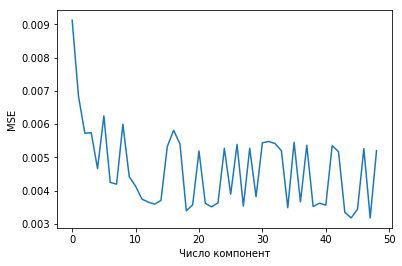

In [538]:
res_x_1_3 = np.arange(1, 50, dtype = float)
for k in np.arange(1, 50):
    pls = PLSRegression(n_components=k, scale=False, trans_function_name='slow_growth')
    pls.fit(X_train, Y_train)
    Y_pred = pls.predict(X_test)
    res_x_1_3[k - 1] = mean_squared_error(Y_test, Y_pred)
#     print(res[k-1])
plt.plot(res_x_1_3)
plt.xlabel('Число компонент')
plt.ylabel('MSE')

In [539]:
res_x_1_3

array([ 0.00912176,  0.00683026,  0.00572403,  0.0057394 ,  0.00465942,
        0.00624504,  0.00424515,  0.00419037,  0.00599412,  0.00441522,
        0.00413193,  0.00374181,  0.00365126,  0.00359121,  0.00369873,
        0.00532045,  0.00581169,  0.0053997 ,  0.00338914,  0.00356756,
        0.00518819,  0.00361403,  0.00350797,  0.00362996,  0.00526941,
        0.00388783,  0.00538841,  0.00353375,  0.00527147,  0.00381153,
        0.00543514,  0.00547525,  0.00541189,  0.00519664,  0.00348258,
        0.00545128,  0.00365896,  0.00536263,  0.00352003,  0.00361817,
        0.00355959,  0.0053481 ,  0.0051711 ,  0.00334365,  0.00317648,
        0.00343762,  0.00525835,  0.00317572,  0.00520006])

In [522]:
res7 = bezier(res_very_slow, np.arange(len(res_very_slow)) / len(res_very_slow))

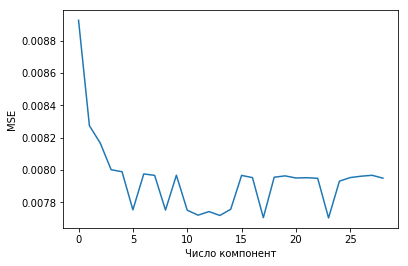

In [532]:
res_x_2 = np.zeros((29,))
for k in np.arange(1, 30):
    pls = PLSRegression(n_components=k, scale=False, trans_function_name='sigmoid')
    pls.fit(X_train, Y_train)
    Y_pred = pls.predict(X_test)
    res_x_2[k - 1] = mean_squared_error(Y_test, Y_pred)
#     print(res[k-1])
plt.plot(res_x_2)
plt.xlabel('Число компонент')
plt.ylabel('MSE')
# plt.savefig('exp_x_1_5', transparent=True)

In [533]:
res_x_2

array([ 0.00892772,  0.00827464,  0.00816653,  0.0080019 ,  0.00798951,
        0.00775344,  0.00797576,  0.00796698,  0.007752  ,  0.00796778,
        0.00775093,  0.00772045,  0.00774262,  0.00771861,  0.00775703,
        0.00796676,  0.00795302,  0.0077049 ,  0.00795553,  0.00796378,
        0.00795067,  0.0079524 ,  0.00794883,  0.0077034 ,  0.00793104,
        0.00795339,  0.00796177,  0.00796744,  0.00794974])

In [496]:
pls = PLSRegression(n_components=4, scale=False, trans_function_name='very_slow_stabilization')
pls.fit(X_train, Y_train)
Y_pred = pls.predict(X_test)
res_5 = mean_squared_error(Y_test, Y_pred)
res_5

0.0046949661373425376

In [498]:
res4 = bezier(res_x_1_5, np.arange(len(res_x_1_5)) / len(res_x_1_5))

In [470]:
res3 = bezier(res_x_1_4, np.arange(len(res_x_1_4)) / len(res_x_1_4))

In [465]:
res1 = bezier(res, np.arange(len(res)) / len(res))

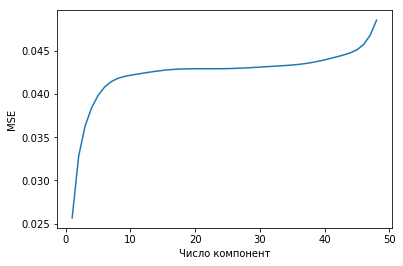

In [523]:
plt.plot(res7)
plt.xlabel('Число компонент')
plt.ylabel('MSE')
plt.savefig('exp_x_2', transparent=True)

In [196]:
pls.fit(X_train, Y_train)

PLSRegression(copy=True, max_iter=500, n_components=3, scale=False, tol=1e-06,
       trans_function_name='very_fast_growth')

In [197]:
Y_pred = pls.predict(X_test)

In [198]:
print(mean_squared_error(Y_test, Y_pred))

0.00720046360813


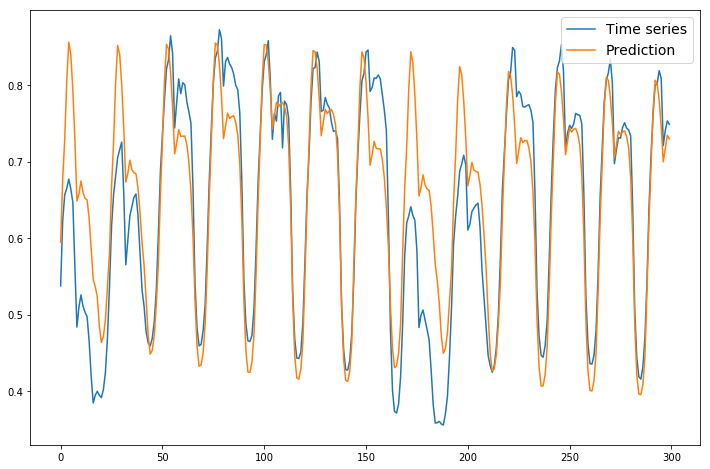

In [182]:
ts_test = Y_test.ravel()
ts_pred = Y_pred.ravel()

plt.figure(figsize=(12, 8))
plt.plot(ts_test[:300], label='Time series')
plt.plot(ts_pred[:300], label='Prediction')
plt.legend(fontsize=14)
plt.show()

In [300]:
data_ch1 = sc.io.loadmat('../data/data_mat/ECoG_ch1.mat')['ECoGData_ch1'][0]
time = sc.io.loadmat('../data/data_mat/ECoG_time.mat')['ECoGTime'][0]
motion = sc.io.loadmat('../data/data_mat/Motion.mat')['MotionTime'][0]
print(data_ch1.shape, time.shape, motion.shape)
data_ch1 = data_ch1[:10000]

(993793,) (993793,) (116495,)


In [302]:
data_32 = sc.io.loadmat('../data/32_channels_template.mat')

In [368]:
A = np.array([1, 2])* np.array([3, 4])
A

array([3, 8])

In [364]:
A[:,1]

TypeError: tuple indices must be integers or slices, not tuple

In [345]:
np.arange(3)

array([0, 1, 2])

In [288]:
n_features = 2500
n_pred = 4
length = len(data_ch1)
n_objects = length - n_features - n_pred
X = np.zeros([n_objects, n_features])
Y = np.zeros([n_objects, n_pred])

for i in range(n_objects):
    X[i, :] = data_ch1[i:i + n_features]
    Y[i, :] = data_ch1[i + n_features: i + n_features + n_pred]

In [289]:
X_train, X_test = X[:700, :], X[700:, :]
Y_train, Y_test = Y[:700, :], Y[700:, :]

In [290]:
pls = PLSRegression(n_components=2, scale=False, trans_function_name='very_fast_growth')
pls.fit(X_train, Y_train)
Y_pred = pls.predict(X_test)

In [291]:
print(mean_squared_error(Y_test, Y_pred))

557.156792413


1
2
3


/Users/m/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:96: UserWarning: Y residual constant at iteration 1


4
5
6
7


/Users/m/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:119: UserWarning: X scores are null at iteration 4


8


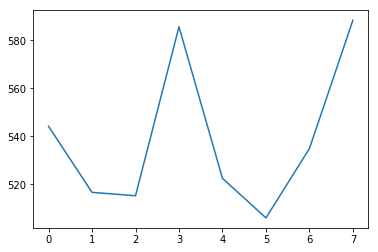

In [292]:
res = np.arange(1, 9, dtype = float)
for k in np.arange(1, 9):
    print(k)
    pls = PLSRegression(n_components=k, scale=False, trans_function_name='very_fast_growth')
    pls.fit(X_train, Y_train)
    Y_pred = pls.predict(X_test)
    res[k - 1] = mean_squared_error(Y_test, Y_pred)
plt.plot(res)